🚀 476107 adet 'Bilinmeyen' kayıt başarıyla ilçelere dağıtıldı!


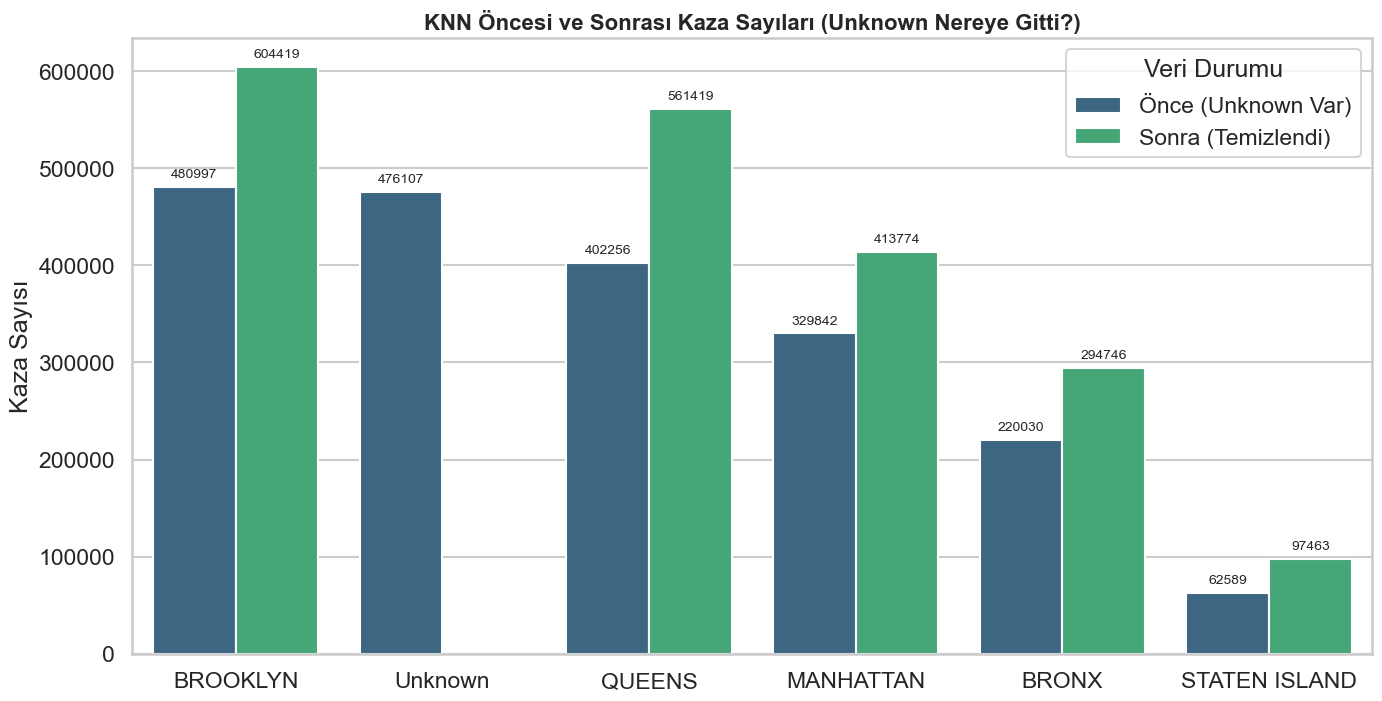

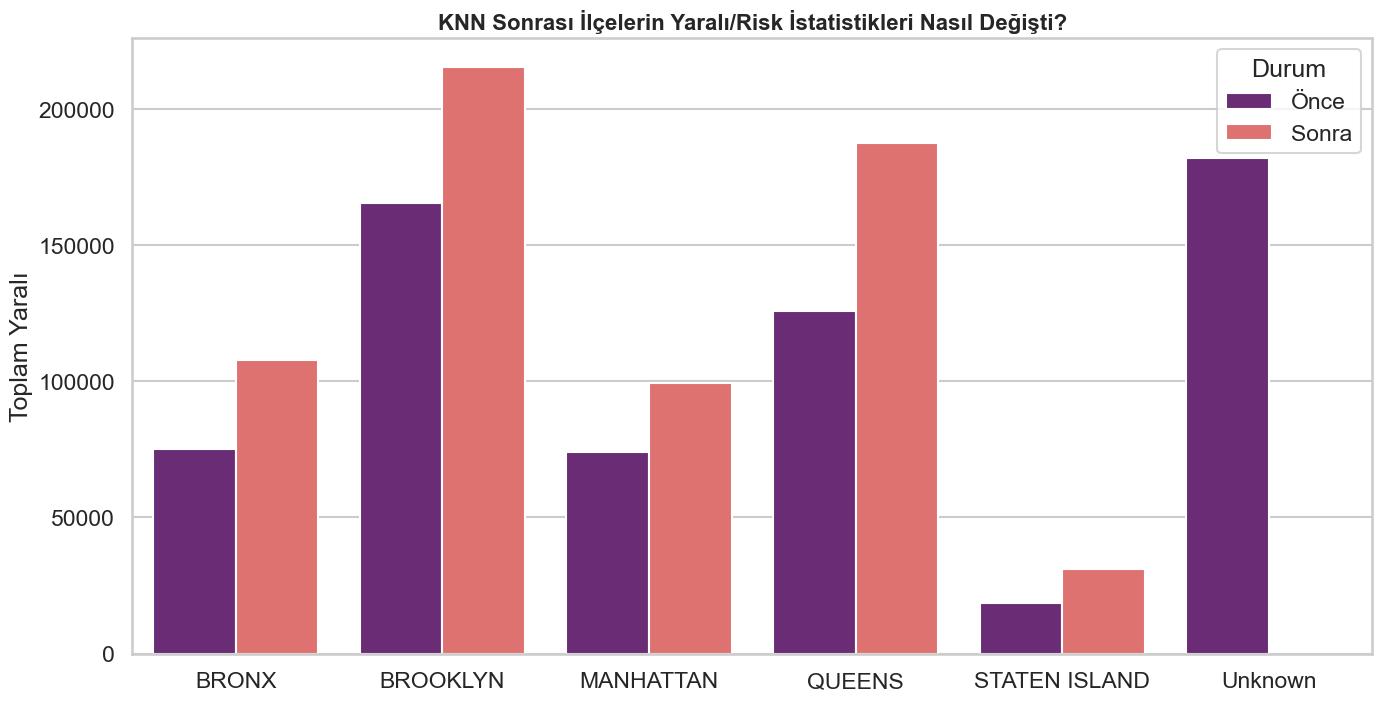


📊 DEĞİŞİM RAPORU:
Hangi İlçeye Ne Kadar Yeni Kaza Eklendi?
----------------------------------------
Borough
QUEENS           159163.0
BROOKLYN         123422.0
MANHATTAN         83932.0
BRONX             74716.0
STATEN ISLAND     34874.0
Name: Kaza Sayısı, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['figure.figsize'] = (18, 10)

df = pd.read_csv('Default_Data.csv', low_memory=False)

df = df[(df['LATITUDE'] != 0) & (df['LONGITUDE'] != 0) & 
        (df['LATITUDE'].notna()) & (df['LONGITUDE'].notna())]


df_before = df.copy()
df_before['BOROUGH'] = df_before['BOROUGH'].fillna('Unknown')


df_after = df.copy()

train_data = df_after[df_after['BOROUGH'].notna()] # Bildiklerimiz
predict_data = df_after[df_after['BOROUGH'].isna()] # Bilmediklerimiz

if len(predict_data) > 0:
    knn = KNeighborsClassifier(n_neighbors=3)
    X_train = train_data[['LATITUDE', 'LONGITUDE']]
    y_train = train_data['BOROUGH']
    knn.fit(X_train, y_train)
    
    predicted_boroughs = knn.predict(predict_data[['LATITUDE', 'LONGITUDE']])
    df_after.loc[predict_data.index, 'BOROUGH'] = predicted_boroughs
    print(f"🚀 {len(predict_data)} adet 'Bilinmeyen' kayıt başarıyla ilçelere dağıtıldı!")


count_before = df_before['BOROUGH'].value_counts().reset_index()
count_before.columns = ['Borough', 'Kaza Sayısı']
count_before['Durum'] = 'Önce (Unknown Var)'

count_after = df_after['BOROUGH'].value_counts().reset_index()
count_after.columns = ['Borough', 'Kaza Sayısı']
count_after['Durum'] = 'Sonra (Temizlendi)'

comparison_df = pd.concat([count_before, count_after])

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=comparison_df, x='Borough', y='Kaza Sayısı', hue='Durum', palette='viridis')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize=10)

plt.title('KNN Öncesi ve Sonrası Kaza Sayıları (Unknown Nereye Gitti?)', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.legend(title='Veri Durumu')
plt.show()

injury_cols = ['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED']

total_injuries_before = df_before.groupby('BOROUGH')[injury_cols].sum().sum(axis=1).reset_index(name='Toplam Yaralı')
total_injuries_before['Durum'] = 'Önce'

total_injuries_after = df_after.groupby('BOROUGH')[injury_cols].sum().sum(axis=1).reset_index(name='Toplam Yaralı')
total_injuries_after['Durum'] = 'Sonra'

injury_comparison = pd.concat([total_injuries_before, total_injuries_after])

plt.figure(figsize=(16, 8))
sns.barplot(data=injury_comparison, x='BOROUGH', y='Toplam Yaralı', hue='Durum', palette='magma')
plt.title('KNN Sonrası İlçelerin Yaralı/Risk İstatistikleri Nasıl Değişti?', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.show()


print("\nDEĞİŞİM RAPORU:")
diff = count_after.set_index('Borough')['Kaza Sayısı'] - count_before.set_index('Borough')['Kaza Sayısı']
diff = diff.dropna().sort_values(ascending=False)

print("Hangi İlçeye Ne Kadar Yeni Kaza Eklendi?")
print("-" * 40)
print(diff)

Dosyalar okunuyor...
✅ Yüklendi! Ham Veri: (2218631, 29), Temiz Veri: (1953027, 23)


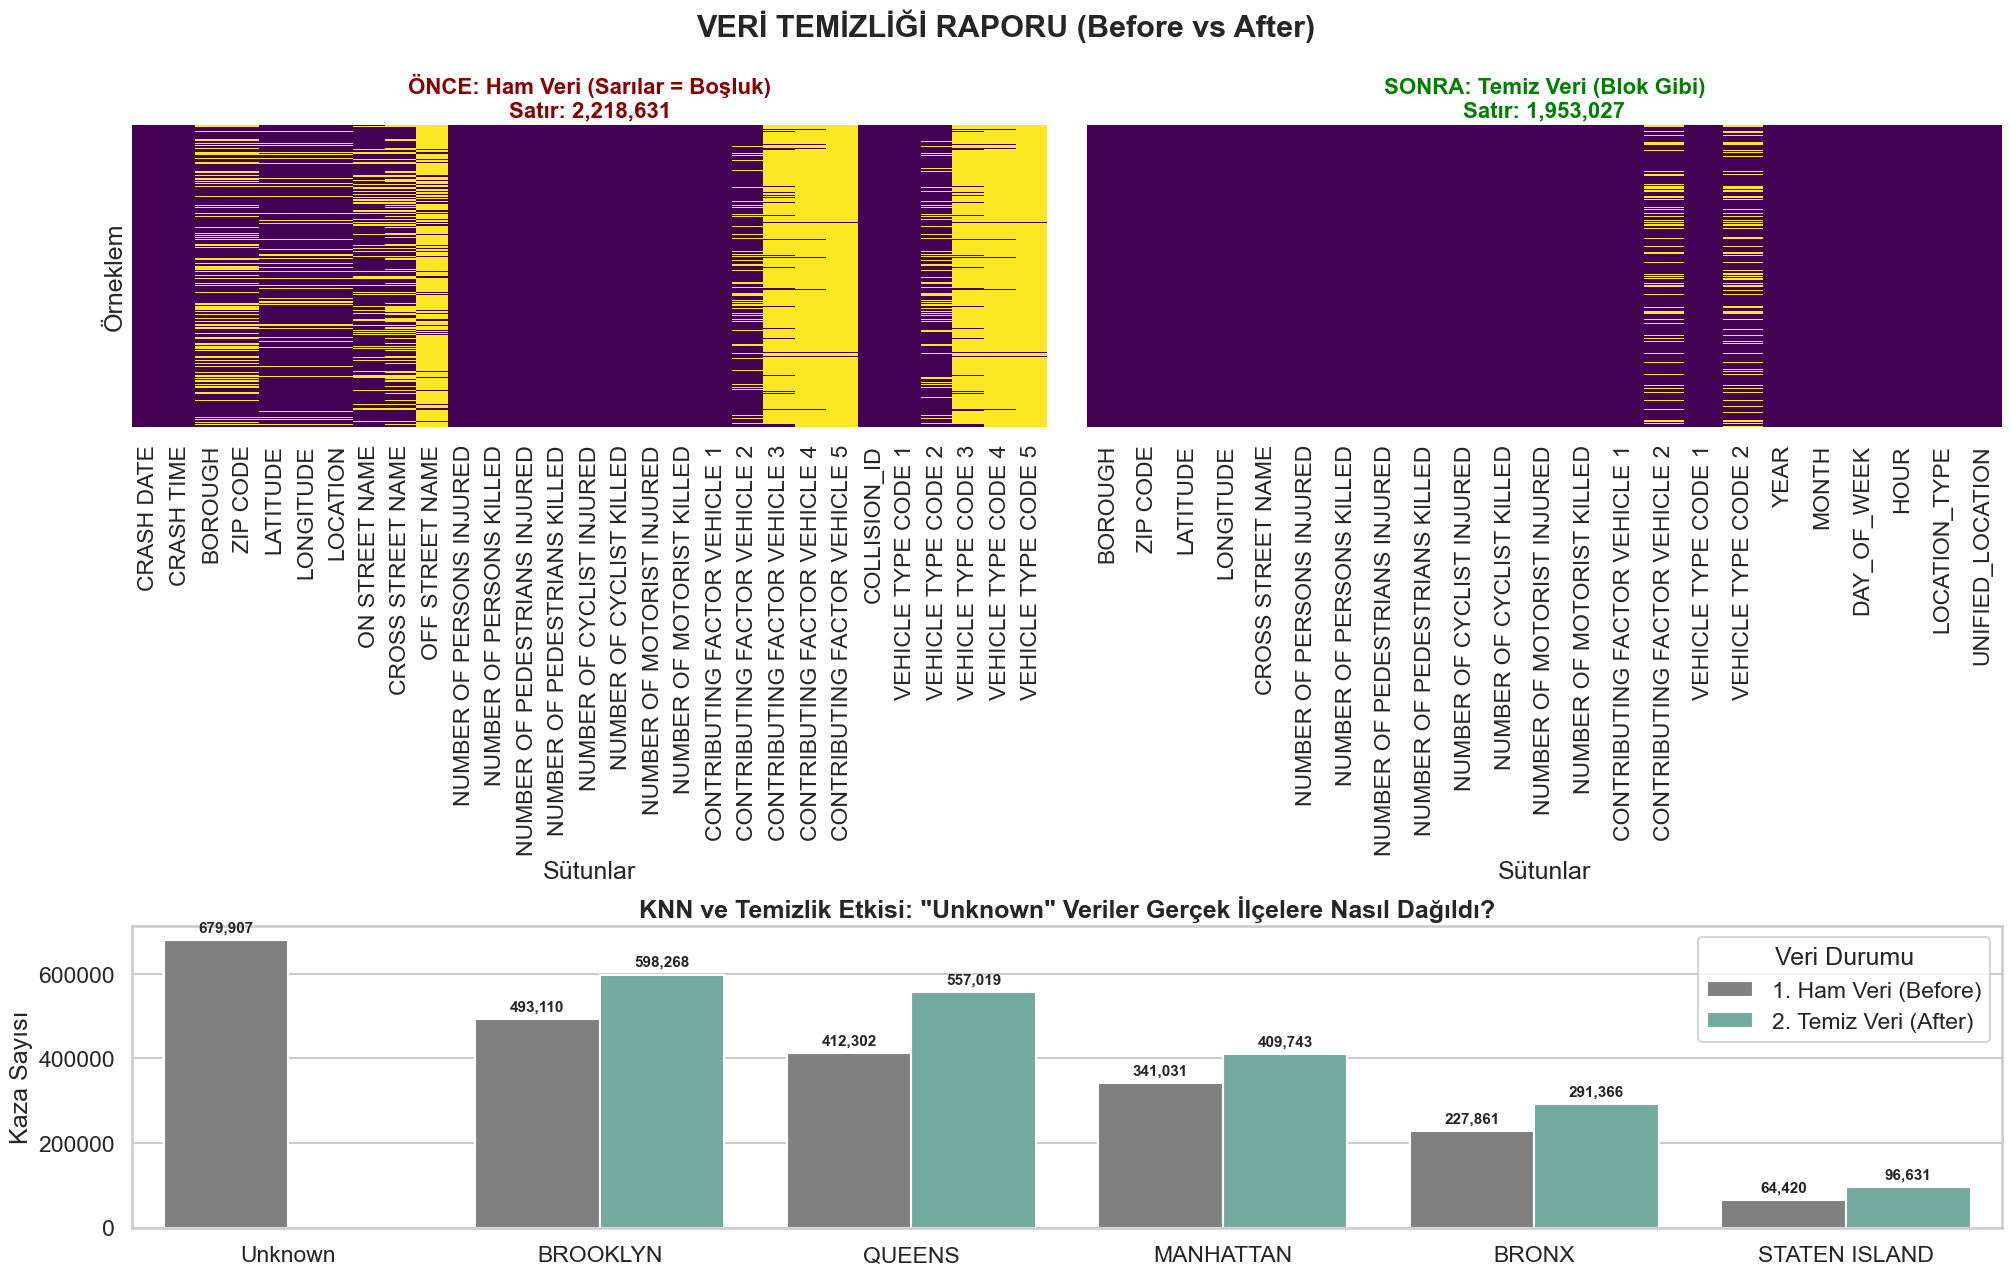


📊 DETAYLI DEĞİŞİM RAPORU
📉 SİLİNEN ÇÖP VERİ: 265,604 satır (%11.97)
   (Sebep: Hatalı koordinat, araçsız kayıt veya mükerrer veri)
--------------------------------------------------
📈 KURTARILAN BÖLGELER (KNN Sonrası Artış):
   ✅ BROOKLYN: +105,158 yeni kayıt eklendi.
   ✅ BRONX: +63,505 yeni kayıt eklendi.
   ✅ MANHATTAN: +68,712 yeni kayıt eklendi.
   ✅ QUEENS: +144,717 yeni kayıt eklendi.
   ✅ STATEN ISLAND: +32,211 yeni kayıt eklendi.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 12)
sns.set_theme(style="whitegrid", context="talk")


print("Dosyalar okunuyor...")
try:
    df_before = pd.read_csv('Default_Data.csv', low_memory=False)
    df_after = pd.read_csv('Procces_Data.csv', low_memory=False)
    print(f"Yüklendi! Ham Veri: {df_before.shape}, Temiz Veri: {df_after.shape}")
except FileNotFoundError:
    print("Hata: Dosyalar bulunamadı. Lütfen dosya isimlerini kontrol et.")


fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2)

sample_before = df_before.sample(n=min(10000, len(df_before)), random_state=42)
sample_after = df_after.sample(n=min(10000, len(df_after)), random_state=42)

ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(sample_before.isnull(), cbar=False, yticklabels=False, cmap='viridis', ax=ax1)
ax1.set_title(f'ÖNCE: Ham Veri (Sarılar = Boşluk)\nSatır: {len(df_before):,}', fontsize=16, color='darkred', fontweight='bold')
ax1.set_ylabel('Örneklem')
ax1.set_xlabel('Sütunlar')

ax2 = fig.add_subplot(gs[0, 1])
sns.heatmap(sample_after.isnull(), cbar=False, yticklabels=False, cmap='viridis', ax=ax2)
ax2.set_title(f'SONRA: Temiz Veri (Blok Gibi)\nSatır: {len(df_after):,}', fontsize=16, color='green', fontweight='bold')
ax2.set_xlabel('Sütunlar')


count_before = df_before['BOROUGH'].fillna('Unknown').value_counts().reset_index()
count_before.columns = ['Borough', 'Count']
count_before['Durum'] = '1. Ham Veri (Before)'

count_after = df_after['BOROUGH'].value_counts().reset_index()
count_after.columns = ['Borough', 'Count']
count_after['Durum'] = '2. Temiz Veri (After)'

comp_df = pd.concat([count_before, count_after])

ax3 = fig.add_subplot(gs[1, :])
sns.barplot(data=comp_df, x='Borough', y='Count', hue='Durum', 
            palette={'1. Ham Veri (Before)': 'gray', '2. Temiz Veri (After)': '#69b3a2'}, ax=ax3)

for p in ax3.patches:
    if p.get_height() > 0:
        ax3.annotate(f'{int(p.get_height()):,}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), textcoords = 'offset points', fontsize=11, fontweight='bold')

ax3.set_title('KNN ve Temizlik Etkisi: "Unknown" Veriler Gerçek İlçelere Nasıl Dağıldı?', fontsize=18, fontweight='bold')
ax3.set_ylabel('Kaza Sayısı')
ax3.set_xlabel('')
ax3.legend(loc='upper right', title='Veri Durumu')

plt.suptitle("VERİ TEMİZLİĞİ RAPORU (Before vs After)", fontsize=22, fontweight='bold', y=1.05)
plt.show()

print("\n" + "="*50)
print("DETAYLI DEĞİŞİM RAPORU")
print("="*50)
diff_rows = len(df_before) - len(df_after)
print(f"SİLİNEN ÇÖP VERİ: {diff_rows:,} satır (%{(diff_rows/len(df_before)*100):.2f})")
print(f"   (Sebep: Hatalı koordinat, araçsız kayıt veya mükerrer veri)")
print("-" * 50)
print("KURTARILAN BÖLGELER (KNN Sonrası Artış):")
for borough in df_after['BOROUGH'].unique():
    if borough != 'Unknown':
        cnt_b = len(df_before[df_before['BOROUGH'] == borough])
        cnt_a = len(df_after[df_after['BOROUGH'] == borough])
        fark = cnt_a - cnt_b
        if fark > 0:
            print(f"{borough}: +{fark:,} yeni kayıt eklendi.")
print("="*50)